In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from plotnine import *

### Wczytanie i preprocessing danych

#### Dane trywialne

In [57]:
dane = pd.DataFrame({'x' : [2, 1, 0, -1, -2, -1,  0,  1],
                     'y' : [0, 1, 2,  1,  0, -1, -2, -1],
                     'c' : [0, 1, 2,  3,  4,  5,  6,  7]})
A = np.array([[3,0],[4,5]])
dane[['x_A', 'y_A']] = np.matmul(dane.iloc[:,:2], A)

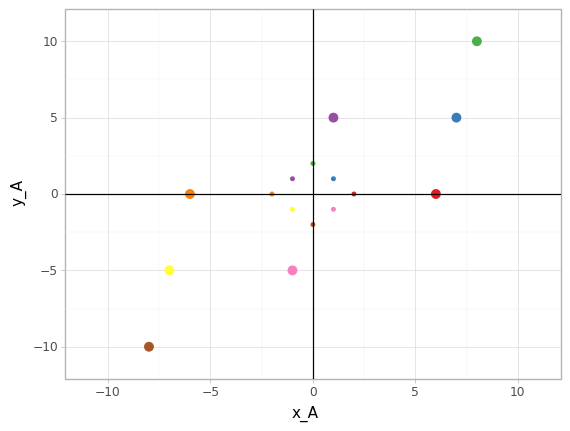

<ggplot: (709708473)>

In [58]:
(ggplot(dane, aes('x_A','y_A', color = 'factor(c)')) +
 geom_point(size = 3, show_legend = False) +
 geom_point(aes('x','y', color = 'factor(c)'), size = 1, show_legend = False) +
 geom_hline(yintercept = 0) +
 geom_vline(xintercept = 0) +
 scale_color_brewer(type="qual", palette="Set1") +
 theme(figure_size=(5, 5)) +
 theme_light() +
 xlim(-11,11) +
 ylim(-11,11) 
)

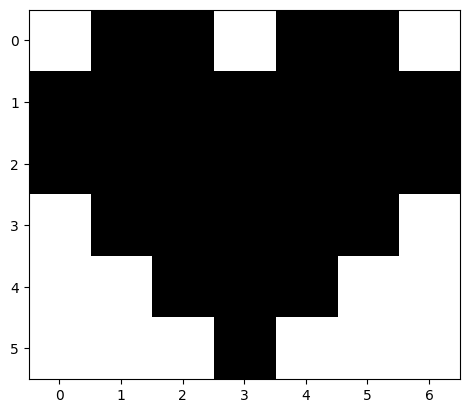

In [59]:
serce = np.array([[0,1,1,0,1,1,0],
              [1,1,1,1,1,1,1],
              [1,1,1,1,1,1,1],
              [0,1,1,1,1,1,0],
              [0,0,1,1,1,0,0],
              [0,0,0,1,0,0,0],
             ])
plt.imshow(1-serce, cmap='gray')
plt.show()

#### Dane rzeczywiste

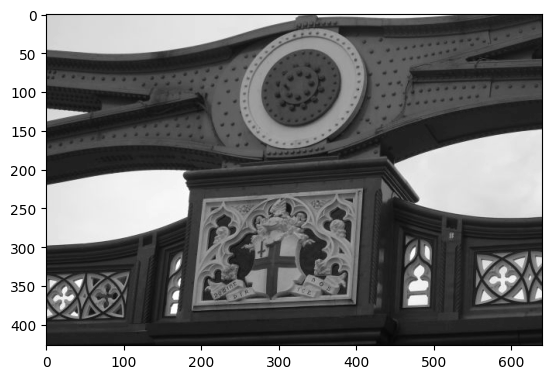

In [60]:
most = plt.imread('most.jpg', format='jpeg')
most_flat = most.reshape(-1, 3)

most_sr = most_flat.mean(axis=1)
most_sr = most_sr.reshape(most.shape[:-1])
plt.imshow(most_sr, cmap='gray')
plt.show()

### Rozkład według wartości osobliwych (**SVD** - *Singular Value Decomposition*)

każdą macierz rzeczywistą $A$ można przedstawić w postaci dekompozycji na iloczyn trzech specyficznych macierzy:

$$ A=U\Sigma V^{T},$$


gdzie:

$U$ i $V$ – macierze ortogonalne (czyli $U^{-1}=U^{T}$ $V^{-1}=V^T)$,

$\Sigma$  – macierz diagonalna, taka że $\Sigma={diag}(\sigma _{i})$ gdzie $\sigma_{i}$ – nieujemne wartości szczególne (osobliwe) macierzy $A$, zwyczajowo uporządkowane nierosnąco.

In [61]:
from numpy.linalg import svd

In [62]:
n = len(most_sr)
U, S, V = svd(most_sr)

In [63]:
print(f'Macierz U ma wymiary {U.shape}')
print(f'Macierz S ma wymiary {S.shape}')
print(f'Macierz V ma wymiary {V.shape}')

Macierz U ma wymiary (427, 427)
Macierz S ma wymiary (427,)
Macierz V ma wymiary (640, 640)


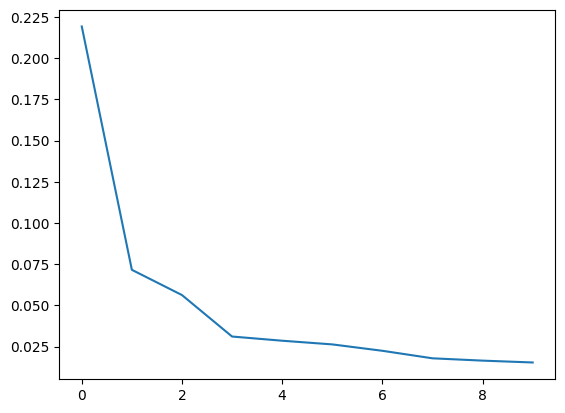

In [64]:
proc_waz = S/sum(S)
plt.plot(proc_waz[:10])

In [65]:
imgs = []
for i in range(n):
    imgs.append(np.matmul(np.matmul(U[:,i:i+1], np.diag(S[i:i+1])), V[i:i+1,:]))

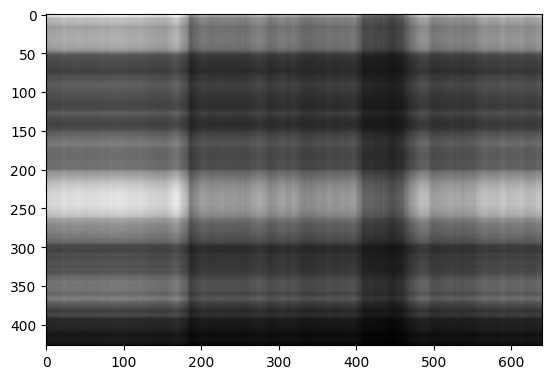

In [66]:
plt.imshow(imgs[0], cmap='gray')
plt.show()

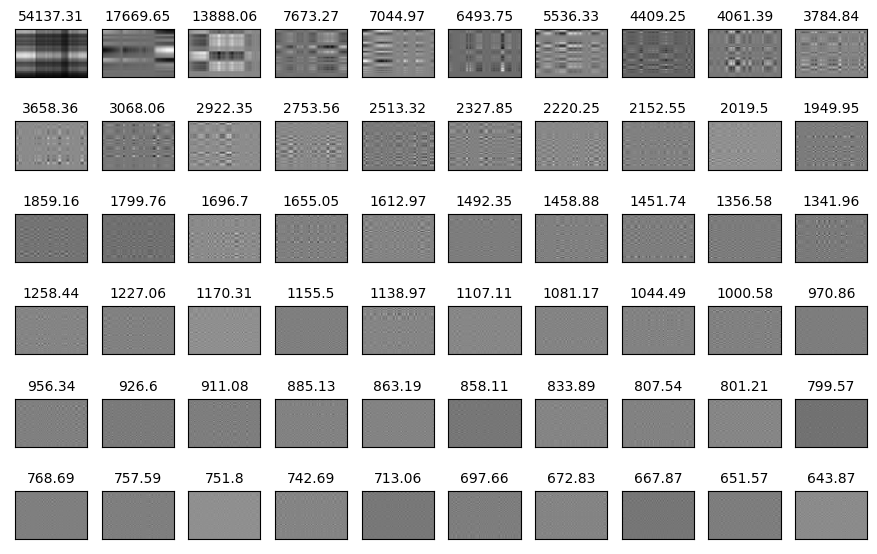

In [67]:
fig, axes = plt.subplots(6, 10, figsize=(11, 7),
                         subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(imgs[i], cmap='gray')
    ax.set_title(np.round(S[i],2), fontsize=10)
plt.show()

In [68]:
razem_imgs = []
for i in range(1,n+1):
    img = np.matmul(np.matmul(U[:,:i], np.diag(S[:i])), V[:i,:])
    razem_imgs.append(img)

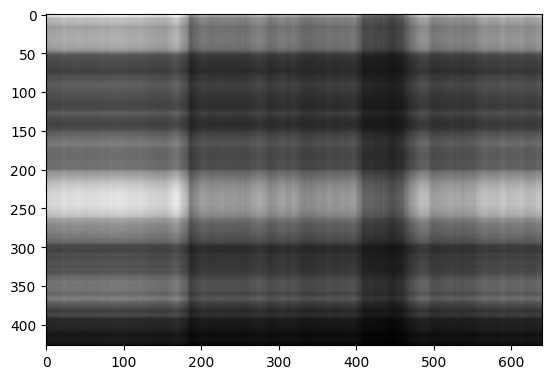

In [69]:
plt.imshow(razem_imgs[0], cmap='gray')
plt.show()

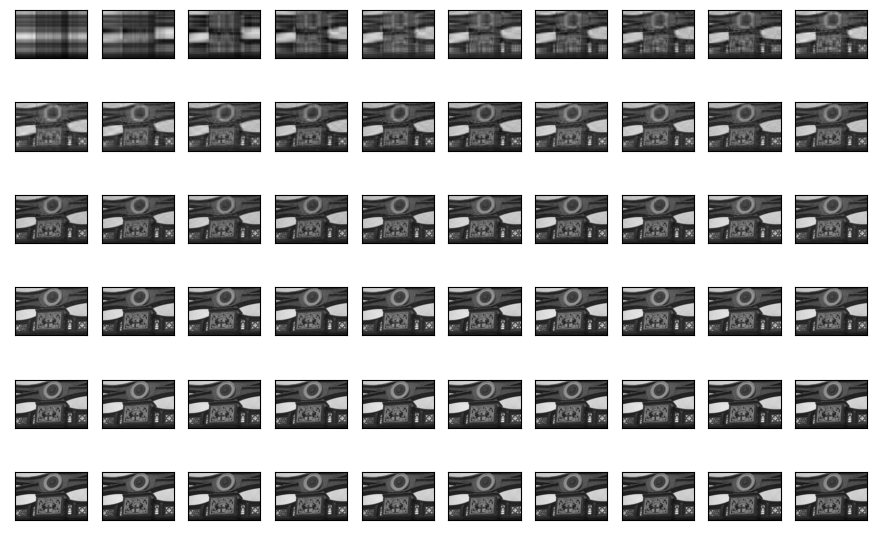

In [70]:
fig, axes = plt.subplots(6, 10, figsize=(11, 7),
                         subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(razem_imgs[i], cmap='gray')
plt.show()

### Analiza głównych składowych

sprowadza się do faktoryzacji macierzy do postaci kanonicznej, gdzie macierz jest reprezentowana poprzez jej wartości własne i wektory własne. Niezerowy wektor $\mathbf{v}$ o wymiarze $m$ jest wektorem własnym kwadratowej macierzy $\mathbf{A}$ $mxm$, jeśli spełnia równanie liniowe postaci:

$$\mathbf{A}\mathbf{v}= \lambda\mathbf{v}$$

dla niektórych skalarów $\lambda$. Wtedy $\lambda$ nazywana jest wartością własną odpowiadającą $\mathbf{v}$. Geometrycznie, wektory własne $\mathbf{A}$ są wektorami, które $\mathbf{A}$ jedynie wydłużają lub kurczą, a wielkość, o którą się wydłużają/skurczają, jest wartością własną. Powyższe równanie nazywa się równaniem wartości własnej.

In [71]:
from numpy.linalg import eig

#### Dane trywialne

In [72]:
A_cov = dane[['x_A', 'y_A']].cov()

In [73]:
A_val, A_vec = eig(A_cov)

In [74]:
print(A_val)
print(A_vec)

[77.14285714  8.57142857]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [75]:
n_components = 1 # 2
A_vec1 = A_vec[:,:n_components]

In [76]:
x_reduced = np.matmul(dane[['x_A', 'y_A']], A_vec1)

dane[['x_Eig1', 'y_Eig1']] = np.matmul(x_reduced, A_vec1.T)

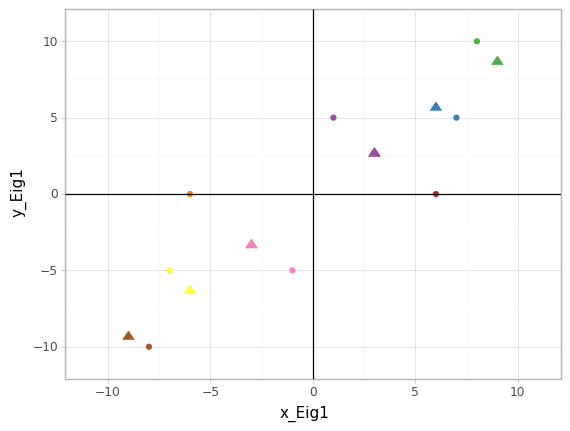

<ggplot: (710420000)>

In [77]:
(ggplot(dane, aes('x_Eig1','y_Eig1', color = 'factor(c)')) +
 geom_point(size = 4, shape = 6, show_legend = False) +
 geom_point(aes('x_A','y_A', color = 'factor(c)'), show_legend = False) +
 geom_hline(yintercept = 0) +
 geom_vline(xintercept = 0) +
 scale_color_brewer(type="qual", palette="Set1") +
 theme(figure_size=(5, 5)) +
 theme_light() +
 xlim(-11,11) +
 ylim(-11,11) 
)

#### Serce

In [78]:
most_sr_cov = np.cov(serce, rowvar = False)
val, vec = eig(most_sr_cov)

In [79]:
print(val.shape)
print(vec.shape)

(7,)
(7, 7)


In [80]:
n = len(serce)
imgs = []
for i in range(1,n+1):
    vectemp = vec[:,:i]
    x_reduced = np.dot(vectemp.T,serce.T)
    sercetemp= np.matmul(vectemp,x_reduced).T
    imgs.append(sercetemp.real)

In [81]:
n = len(serce)
imgs = []
for i in range(1,n+1):
    vectemp = vec[:,:i]
    x_reduced = np.matmul(serce, vectemp)
    sercetemp= np.matmul(x_reduced, vectemp.T)
    imgs.append(sercetemp.real)

In [82]:
print(len(imgs))
imgs

6


[array([[ 0.65467721,  0.76330826,  0.48524041, -0.06080575,  0.48524041,
          0.76330826,  0.65467721],
        [ 0.98201581,  1.14496239,  0.72786061, -0.09120863,  0.72786061,
          1.14496239,  0.98201581],
        [ 0.98201581,  1.14496239,  0.72786061, -0.09120863,  0.72786061,
          1.14496239,  0.98201581],
        [ 0.63873544,  0.74472126,  0.47342452, -0.0593251 ,  0.47342452,
          0.74472126,  0.63873544],
        [ 0.23849432,  0.27806785,  0.17676968, -0.02215111,  0.17676968,
          0.27806785,  0.23849432],
        [-0.01594177, -0.01858699, -0.01181588,  0.00148065, -0.01181588,
         -0.01858699, -0.01594177]]),
 array([[ 0.15467721,  1.01330826,  0.73524041, -0.56080575,  0.73524041,
          1.01330826,  0.15467721],
        [ 1.23201581,  1.01996239,  0.60286061,  0.15879137,  0.60286061,
          1.01996239,  1.23201581],
        [ 1.23201581,  1.01996239,  0.60286061,  0.15879137,  0.60286061,
          1.01996239,  1.23201581],
        

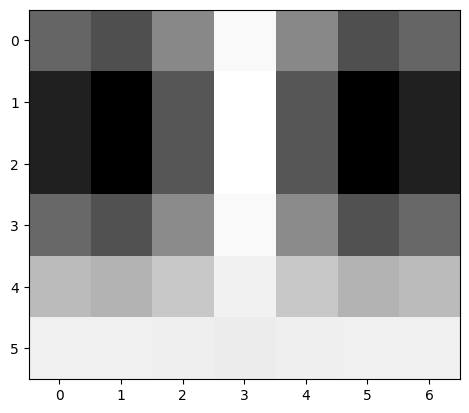

In [83]:
plt.imshow(1-imgs[0], cmap='gray')
plt.show()

In [84]:
razem_imgs = []
for i in range(n+1):
    img = sum(imgs[:i+1])
    razem_imgs.append(img)

In [85]:
proc_val = val.real/sum(val.real)

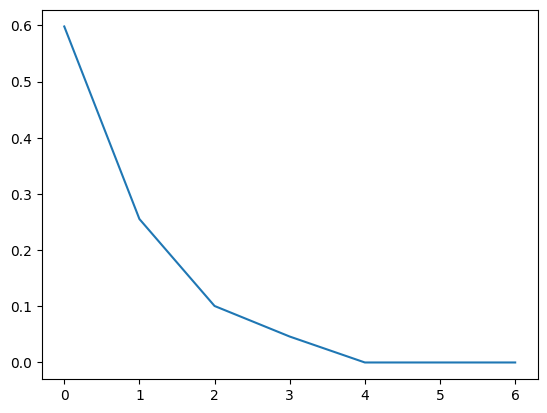

In [86]:
%matplotlib inline
plt.plot(proc_val)

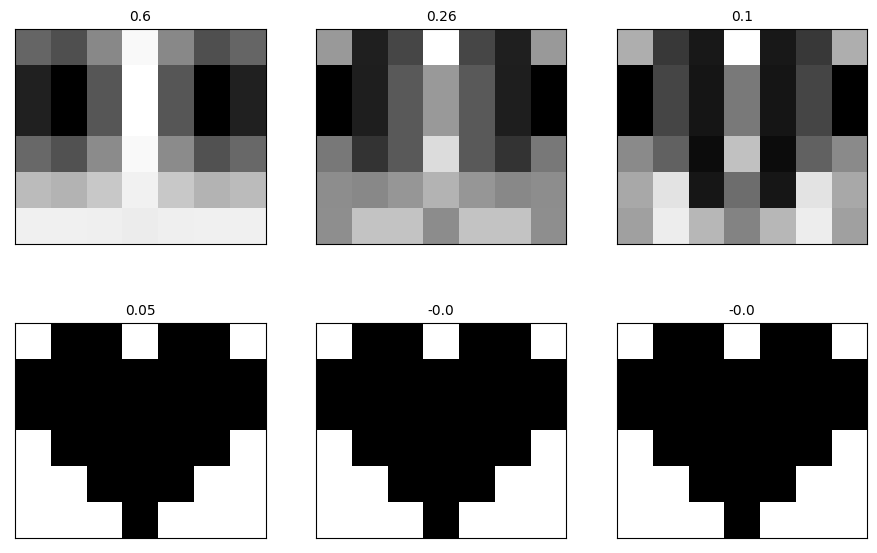

In [87]:
fig, axes = plt.subplots(2, 3, figsize=(11, 7),
                         subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(1-imgs[i], cmap='gray')
    ax.set_title(np.round(proc_val[i],2), fontsize=10)
plt.show()

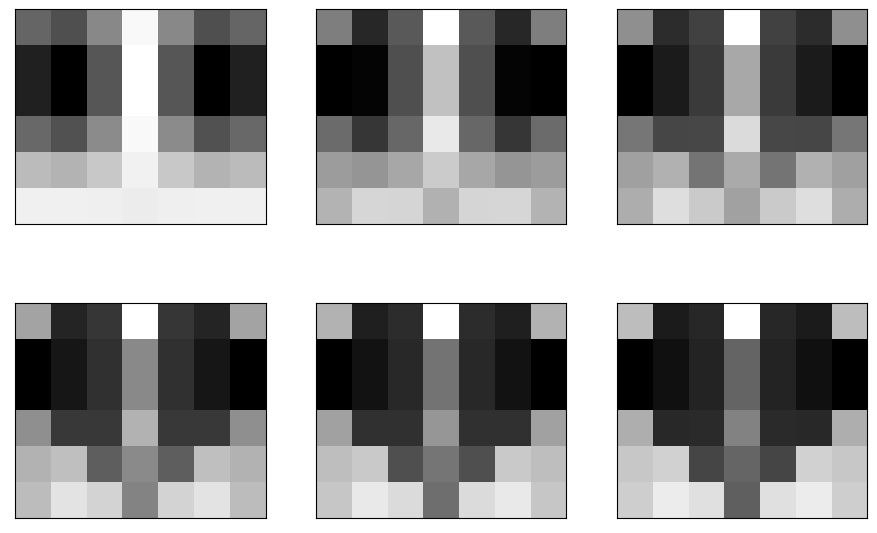

In [88]:
fig, axes = plt.subplots(2, 3, figsize=(11, 7),
                         subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(1-razem_imgs[i], cmap='gray')
plt.show()

#### Dane rzeczywiste

In [89]:
most_sr_cov = np.cov(most_sr, rowvar = False)
val, vec = eig(most_sr_cov)
print(val.shape)
print(vec.shape)

(640,)
(640, 640)


/Users/lswarss/Code/StudySpace/ML_Data_Analysis/env/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part


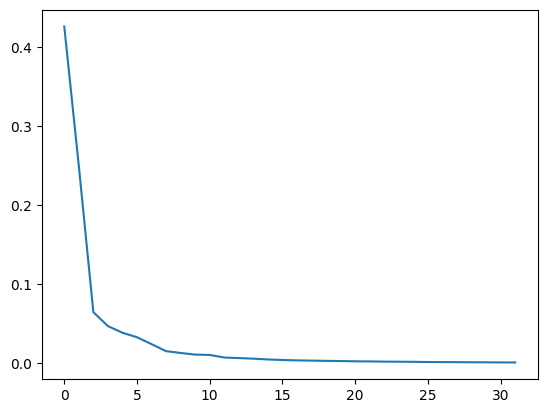

In [90]:
proc_val = val[:32]/sum(val[:32])
plt.plot(proc_val[:32])

In [91]:
n_components = 32
vec32 = vec[:,:n_components]

In [92]:
x_reduced = np.matmul(most_sr, vec32)
print(x_reduced.shape)
most32= np.matmul(x_reduced, vec32.T)
print(most32.shape)

(427, 32)
(427, 640)


(-0.5, 639.5, 426.5, -0.5)

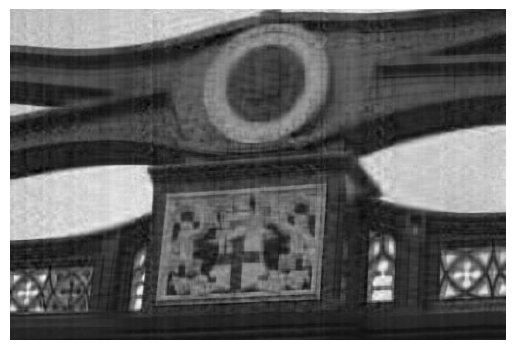

In [93]:
most32=most32.real
plt.imshow(most32 , cmap= 'gray')
plt.axis('off')

(32, 640)
(427, 32)
0.9704945788143479


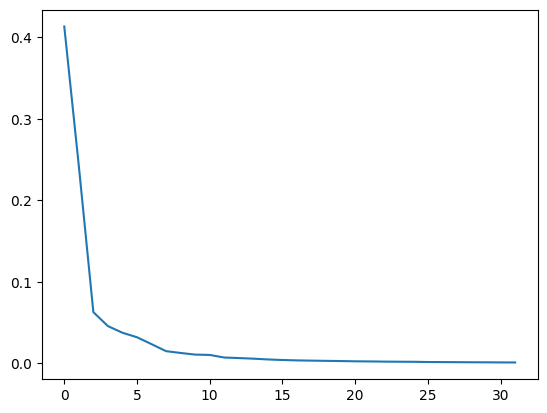

In [94]:
from sklearn.decomposition import PCA

pca = PCA(32).fit(most_sr)
print(pca.components_.shape)
most_transformed = pca.transform(most_sr) 
print(most_transformed.shape)
print(np.sum(pca.explained_variance_ratio_) )
plt.plot(pca.explained_variance_ratio_)

(427, 640)


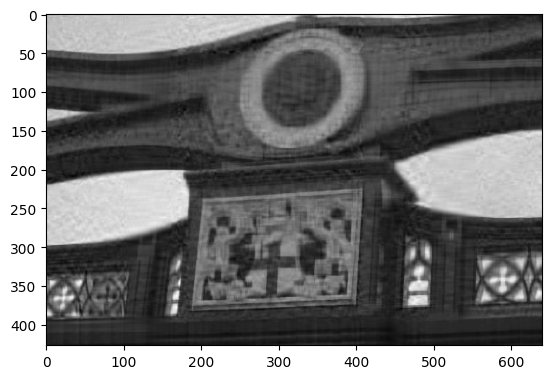

In [95]:
temp = pca.inverse_transform(most_transformed) 
print(temp.shape)
plt.imshow(temp, cmap = "gray")

## Przykład redukcji liczby predykatorów

In [120]:
from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

#### Wczytanie danych

In [167]:
satysf= pd.read_csv('factor.csv', sep = ';', decimal = ',')
# print(satysf)
X = satysf[satysf.columns[:-1]]
y = satysf[satysf.columns[-1]]

print(X)
print(y)

    Wynagrodzenie  Kariera  Spelnienie_zawodowe  Wakacje  Rodzina  \
0         105.126  101.659              115.060  100.281  101.667   
1          77.049   72.933               77.485   93.854   95.392   
2          86.017   82.206               78.889   86.773  108.070   
3          91.425  106.107               95.640  100.248   86.080   
4         113.714   92.029               99.079  104.013   83.271   
..            ...      ...                  ...      ...      ...   
95         94.618  117.866              103.155  118.594  117.448   
96         84.764   97.653               91.380  116.611  116.933   
97        138.876  117.427              112.185   99.538  114.693   
98         95.370   89.835              107.429   92.319  109.707   
99        106.050  120.708              119.815   75.864   93.168   

    Wychowanie_dzieci  
0              85.553  
1              88.609  
2              93.348  
3              93.822  
4              69.621  
..                ...  
95 

#### Standaryzacja

In [136]:
sc_Stand = StandardScaler()
X = sc_Stand.fit_transform(X)

### Oryginalny zestaw cech (predykatorów)

#### Podział na zbiór uczący i treningowy

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

#### Trenowanie modelu z wykorzystaniem algorytmu regresji logistycznej

In [144]:
lr1 = DecisionTreeClassifier()
lr1.fit(X_train, y_train)

DecisionTreeClassifier()

#### Ocena jakości klasyfikatora

In [145]:
print("Wszystkie zmienne:", lr1.score(X_train, y_train))

Wszystkie zmienne: 1.0


In [146]:
y_pred = lr1.predict(X_test)

In [147]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 8  2]
 [ 4 16]]
              precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.89      0.80      0.84        20

    accuracy                           0.80        30
   macro avg       0.78      0.80      0.78        30
weighted avg       0.81      0.80      0.80        30



### Redukcja przestrzeni cech

In [148]:
pca = PCA().fit(X)

#### Wybór liczby nowych cech (głównych składowych)

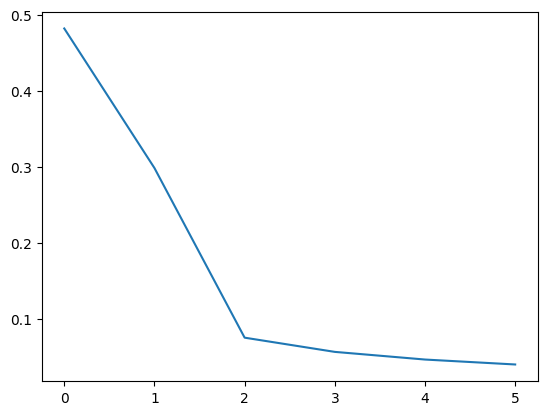

In [149]:
plt.plot(pca.explained_variance_ratio_)

#### Prezentacja oryginalnych cech w przestrzeni nowych ceh

In [150]:
licz_pc = 2
ladunki = pca.components_[:licz_pc].T
skladowe = ["PC"+str(i) for i in range(1, licz_pc+1)]
ladunki_df = pd.DataFrame(ladunki, columns = skladowe,
                        index=satysf.columns[:-1])
ladunki_df

,PC1,PC2
Wynagrodzenie,0.384845,0.421540
Kariera,0.420643,0.404582
Spelnienie_zawodowe,0.436189,0.379748
Wakacje,0.372927,-0.420783
Rodzina,0.415356,-0.427906
Wychowanie_dzieci,0.416049,-0.392742


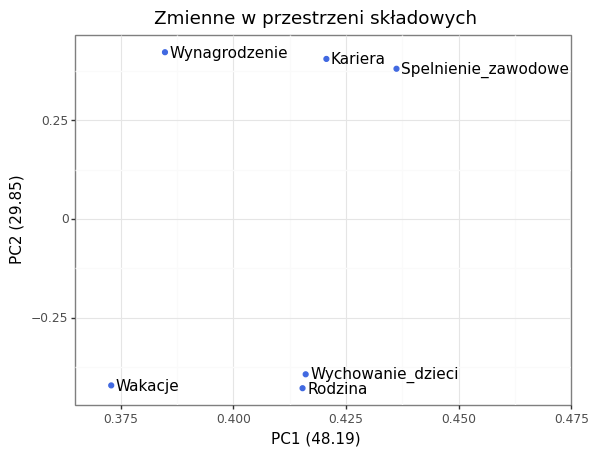

<ggplot: (711544851)>

In [128]:
(ggplot(ladunki_df, aes('PC1', 'PC2')) +
 geom_point(color = "royalblue") +
 theme_bw() +
 geom_text(label = ladunki_df.index, ha='left', nudge_x = 0.001) +
 labs(x = f'PC1 ({round(pca.explained_variance_ratio_[0]*100, 2)})',
     y = f'PC2 ({round(pca.explained_variance_ratio_[1]*100, 2)})',
     title = 'Zmienne w przestrzeni składowych') +
 xlim(0.37,0.47)
)

#### Przygotowanie wartości nowych cech (głównych składowych) dla każdej obserwacji

In [151]:
X_PCA = pca.transform(X)
X_PCA2 = X_PCA[:,0:2]

#### Podział na zbiór uczący i treningowy

In [152]:
X_PCA2_train, X_PCA2_test, y_PCA2_train, y_PCA2_test = train_test_split(X_PCA2, y, test_size=0.30)

#### Trenowanie modelu z wykorzystaniem algorytmu regresji logistycznej

In [153]:
lr2 = DecisionTreeClassifier()
lr2.fit(X_PCA2_train, y_PCA2_train)

DecisionTreeClassifier()

#### Ocena jakości klasyfikatora

In [154]:
print("Dwie składowe:", lr2.score(X_PCA2_train, y_PCA2_train))

Dwie składowe: 1.0


In [155]:
y_PCA2_pred = lr2.predict(X_PCA2_test)

In [156]:
print(confusion_matrix(y_PCA2_test, y_PCA2_pred))
print(classification_report(y_PCA2_test, y_PCA2_pred))

[[11  0]
 [ 1 18]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.95      0.97        19

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

